## Installation and Configuration Instructions for Docker

### 1. Brief Introduction to Docker
Docker is a containerization platform that allows applications to run in isolated environments. If you're new to Docker, watch this introductory video:
[https://www.youtube.com/watch?v=Gjnup-PuquQ](https://www.youtube.com/watch?v=Gjnup-PuquQ)

### 2. Download and Install Docker
Download and install **Docker Desktop** for your operating system from:
[https://www.docker.com](https://www.docker.com)

Follow the official documentation based on your system:
- **Mac**: [https://docs.docker.com/desktop/install/mac-install/](https://docs.docker.com/desktop/install/mac-install/)
- **Windows**: [https://docs.docker.com/desktop/install/windows-install/](https://docs.docker.com/desktop/install/windows-install/)
- **Linux**: [https://docs.docker.com/desktop/install/linux-install/](https://docs.docker.com/desktop/install/linux-install/)

After installation, launch **Docker Desktop** and ensure it is running.

### 3. Pull the Docker Image
The preconfigured Docker image for this setup is available on **Docker Hub**.
To download it, open a terminal (Mac/Linux) or PowerShell (Windows) and run:
```sh
docker pull iszagh/cmdstan_python:latest
```

### 4. Create a Working Directory for Your Files
To keep your work safe and accessible, create a **data_analytics** folder on your computer. This will be used as a bind mount inside the container.
```sh
mkdir -p ~/data_analytics  # Mac/Linux
mkdir data_analytics       # Windows (PowerShell or CMD)
```
If you already have it skip this step, however make sure that name of the folder is exactly **data_analytics**, since we will mount our container's folder on it.

### 5. Run the Container
Run the following command to start the container, bind-mount your working directory, and expose Jupyter Notebook.
```sh
docker run -p 8888:8888 \
  --mount type=bind,source=./data_analytics,target=/workspace \
  -d --name stan iszagh/cmdstan_python
```

### 6. Access Jupyter kernel
Once the container is running you can run **Python notebooks** using `cmdstanpy` and **store your files in `data_analytics/`**, which will persist outside the container. You can do this by using your container as Jupyter Server. To do this simply select your kernel as **Existing jupyter server** and then input **http://localhost:8888/**. Alternatively you can just use browser based interface by clicking **http://localhost:8888/** or use **DevContainers** extension for **VsCode** with **Attach to Running Container…** command.

### 7. Managing the Docker Container
To check if the container is running:
```sh
docker ps
```
To stop the container:
```sh
docker stop stan
```
To restart the container:
```sh
docker start stan
```
To remove the container completely:
```sh
docker rm stan
```


To ensure that everything is working run code below.

In [9]:
import cmdstanpy
import arviz as az
import numpy as np

In [10]:
from cmdstanpy import CmdStanModel

stanfile = 'lab_test/model.stan'
model = CmdStanModel(stan_file=stanfile)

In [11]:
print(model.code())

data {
  int<lower=0> N;
  array[N] int<lower=0,upper=1> y;
}
parameters {
  real<lower=0,upper=1> theta;
}
model {
  theta ~ beta(1,1);  // uniform prior on interval 0,1
  y ~ bernoulli(theta);
}


In [12]:
fit = model.sample(data='lab_test/data.json')
print(fit.summary())

00:35:15 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

00:35:15 - cmdstanpy - INFO - CmdStan done processing.



          Mean      MCSE    StdDev       MAD        5%       50%       95%  \
lp__  -7.29681  0.020961  0.790792  0.333481 -8.873040 -6.988280 -6.749610   
theta  0.24842  0.003063  0.121080  0.122550  0.074702  0.236901  0.471727   

       ESS_bulk  ESS_tail    R_hat  
lp__    1505.11   1767.45  1.00138  
theta   1484.07   1592.24  1.00147  


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.248,0.121,0.042,0.472,0.003,0.002,1484.0,1592.0,1.0


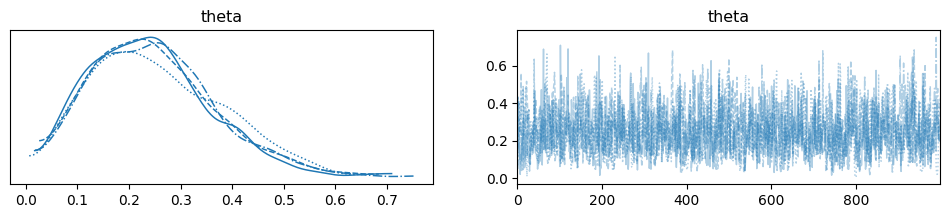

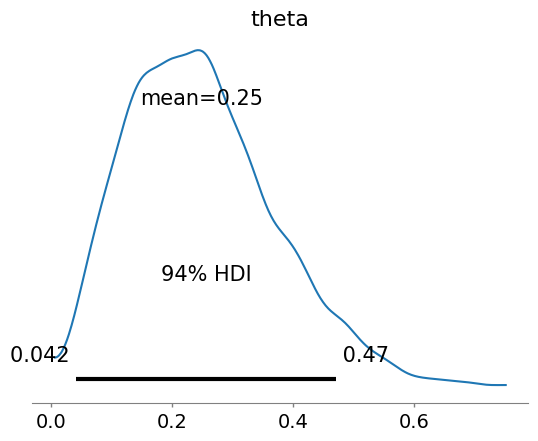

In [13]:
az.plot_trace(fit)
az.plot_posterior(fit)
az.summary(fit)